# Importation des librairies 

In [1]:
import pandas as pd 
from numpy import*
import re
import matplotlib as plt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Chargement et affichage des données

In [2]:
erp = pd.read_csv('erp.csv')
erp.head(2)

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock


In [3]:
erp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 32.4+ KB


In [4]:
web = pd.read_excel('web.xlsx')
web.head(10)

C:\Users\ibenz\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
5,19815,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-12 09:04:37,...,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
6,15303,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-12 09:13:35,...,pierre-jean-villa-saint-joseph-saut-ange-2018,2019-11-02 13:25:07,2019-11-02 12:25:07,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
7,14975,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-12 09:45:14,...,pierre-gaillard-condrieu-2018,2020-08-14 18:15:02,2020-08-14 16:15:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
8,16042,0,0,0,0.0,7.0,taxable,NaN,2.0,2018-02-12 09:54:27,...,pierre-gaillard-cornas-2017,2020-08-14 10:15:02,2020-08-14 08:15:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
9,14980,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-12 10:03:05,...,pierre-gaillard-cote-rotie-esprit-blond-2017,2020-08-24 14:00:03,2020-08-24 12:00:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [5]:
web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    1428 non-null   object        
 1   virtual                1513 non-null   int64         
 2   downloadable           1513 non-null   int64         
 3   rating_count           1513 non-null   int64         
 4   average_rating         1430 non-null   float64       
 5   total_sales            1430 non-null   float64       
 6   tax_status             716 non-null    object        
 7   tax_class              0 non-null      float64       
 8   post_author            1430 non-null   float64       
 9   post_date              1430 non-null   datetime64[ns]
 10  post_date_gmt          1430 non-null   datetime64[ns]
 11  post_content           0 non-null      float64       
 12  post_title             1430 non-null   object        
 13  pos

In [6]:
liaison = pd.read_excel('liaison.xlsx')
liaison.head(2)

C:\Users\ibenz\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,product_id,id_web
0,3847,15298
1,3849,15296


In [7]:
liaison.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  825 non-null    int64 
 1   id_web      734 non-null    object
dtypes: int64(1), object(1)
memory usage: 13.0+ KB


#  Analyse de forme (web)

##### Variable target: SKU
#####  Lignes et colonnes:1431,28
##### Types de variables: qualitatif:      quantitatif:
object            11
float64           10
datetime64[ns]     4
int64              3
dtype: int64
#####  Analyse des valeurs manquantes: il y a  4 groupe de colonnes 100% de valeurs manquantes et trois groupes de colonnes avec 50% de valeurs manquantes

In [8]:
# Utiliser une nouvelle variable pour l'analyse
web_copie= web.copy()

In [9]:
# Afficher les nombres des colonnes et des lignes dans la dataframe web_copie
web_copie.shape

(1513, 28)

In [10]:
# Afficher les types des données dans la dataframe web_copie
web_copie.dtypes.value_counts()

object            11
float64           10
datetime64[ns]     4
int64              3
dtype: int64

<AxesSubplot:>

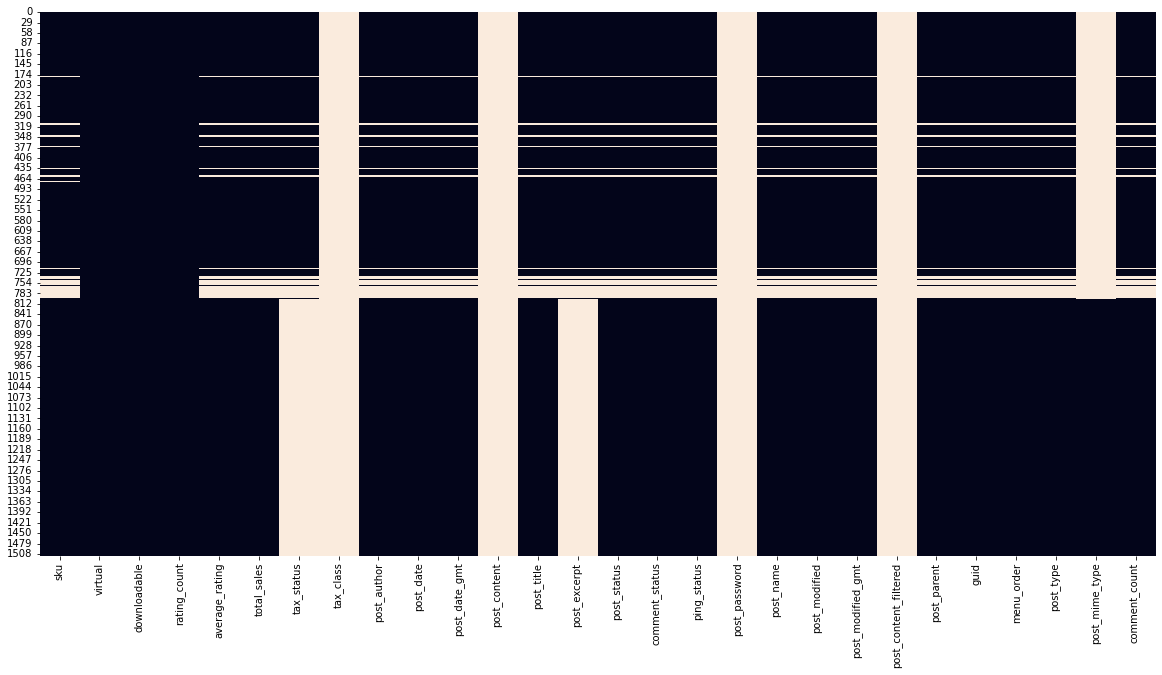

In [11]:
# Utiliser tt d'abord la fonction.isna () de pandas pour verifier les valeurs NaN
#Utiliser la fonction heatmap de seaborn pour afficher notre dataset 
plt.figure( figsize=(20,10)) # Afficher le graphique plus grand avec les dimensions 20,10
sns.heatmap( web_copie.isna(), cbar= False) # cbar=False pour elimimer la color bar

# Conclusion
##### Variable target: price
##### Lignes et colonnes: 825,5
##### Types de variables: qualitatif:       quantitatif:
 int64      3
 float64    1
 object     1
 dtype: int64
##### Analyse des valeurs manquantes: pas de NAN ( valeurs manquantes) 

In [12]:
# Ordre décroissant des pourcentages valeurs manquantes dans la dataframe web ( la somme des valeurs manquantes/le nb de lignes de notre tableau)
(web_copie. isna().sum()/ web_copie.shape [0]). sort_values( ascending=True)

virtual                  0.000000
downloadable             0.000000
rating_count             0.000000
comment_count            0.054858
post_modified_gmt        0.054858
ping_status              0.054858
comment_status           0.054858
post_status              0.054858
post_parent              0.054858
post_title               0.054858
guid                     0.054858
post_date                0.054858
post_name                0.054858
post_author              0.054858
menu_order               0.054858
post_type                0.054858
total_sales              0.054858
average_rating           0.054858
post_date_gmt            0.054858
post_modified            0.054858
sku                      0.056180
tax_status               0.526768
post_excerpt             0.526768
post_mime_type           0.528090
post_content_filtered    1.000000
post_content             1.000000
tax_class                1.000000
post_password            1.000000
dtype: float64

# Analyse du fond

## Visualisation initiale : élimination des colonnes inutiles et nettoyage du fichier web

In [13]:
# Mettre que les valeur <1 donc qui ne sont pas des valeurs manquantes dans la dataframe web
web_copie= web_copie [web_copie.columns[web. isna().sum()/ web.shape [0] <1]]

In [14]:
# Supprimer les doublons dans la dataframe web
web_copie.drop_duplicates(inplace=True)

In [15]:
# afficher les index des lignes 'attachment' dans la colonne 'post_type' 
web_copie[ web_copie['post_type'] == 'attachment' ] .index

Int64Index([ 799,  800,  801,  802,  803,  804,  805,  806,  807,  808,
            ...
            1503, 1504, 1505, 1506, 1507, 1508, 1509, 1510, 1511, 1512],
           dtype='int64', length=714)

In [16]:
# supprimer les lignes 'attachment' de la colonne 'post-type'
web_copie.drop( web_copie[ web_copie['post_type'] == 'attachment' ].index , inplace=True)
web_copie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 717 entries, 0 to 798
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   sku                714 non-null    object        
 1   virtual            717 non-null    int64         
 2   downloadable       717 non-null    int64         
 3   rating_count       717 non-null    int64         
 4   average_rating     716 non-null    float64       
 5   total_sales        716 non-null    float64       
 6   tax_status         716 non-null    object        
 7   post_author        716 non-null    float64       
 8   post_date          716 non-null    datetime64[ns]
 9   post_date_gmt      716 non-null    datetime64[ns]
 10  post_title         716 non-null    object        
 11  post_excerpt       716 non-null    object        
 12  post_status        716 non-null    object        
 13  comment_status     716 non-null    object        
 14  ping_statu

In [17]:
# supprimer les NAN dans la colonne 'SKU'
web_copie= web_copie.dropna(subset=['sku'])
web_copie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 798
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   sku                714 non-null    object        
 1   virtual            714 non-null    int64         
 2   downloadable       714 non-null    int64         
 3   rating_count       714 non-null    int64         
 4   average_rating     714 non-null    float64       
 5   total_sales        714 non-null    float64       
 6   tax_status         714 non-null    object        
 7   post_author        714 non-null    float64       
 8   post_date          714 non-null    datetime64[ns]
 9   post_date_gmt      714 non-null    datetime64[ns]
 10  post_title         714 non-null    object        
 11  post_excerpt       714 non-null    object        
 12  post_status        714 non-null    object        
 13  comment_status     714 non-null    object        
 14  ping_statu

#  Analyse de forme (erp)

In [18]:
# utiliser une nouvelle variable pour l'analyse
erp_copie= erp.copy()

In [19]:
# Afficher les nombres des colonnes et des lignes dans la dataframe erp_copie
erp_copie.shape

(825, 5)

In [20]:
# Afficher les types des données dans la dataframe erp_copie
erp_copie.dtypes.value_counts()

int64      3
float64    1
object     1
dtype: int64

<AxesSubplot:>

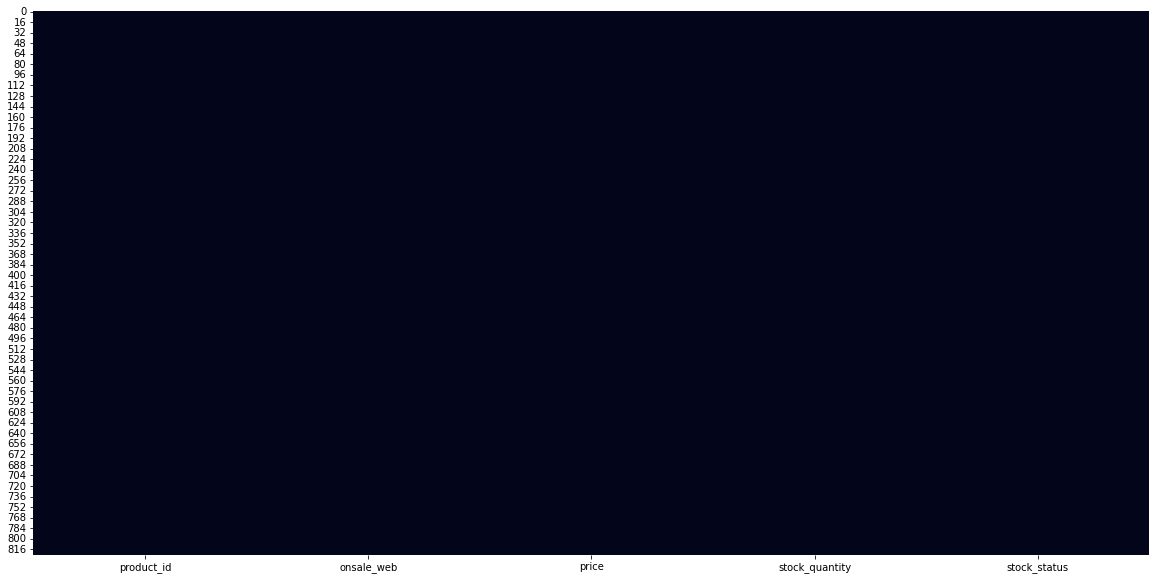

In [21]:
 # Utiliser tt d'abord la fonction.isna () de pandas pour verifier les valeurs NaN
#Utiliser la fonction heatmap de seaborn pour afficher notre dataset 
plt.figure( figsize=(20,10)) # Afficher le graphique plus grand avec les dimensions 20,10
sns.heatmap( erp.isna(), cbar= False) # cbar=False pour elimimer la color bar

# Conclusion
##### Variable target: price
##### Lignes et colonnes: 825,5
##### Types de variables: qualitatif:       quantitatif:
 int64      3
 float64    1
 object     1
 dtype: int64
##### Analyse des valeurs manquantes: pas de NAN ( valeurs manquantes) 

In [22]:
# Supprimer les doublons de la dataframe erp_copie
erp_copie.drop_duplicates(inplace=True)
erp_copie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 825 entries, 0 to 824
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 38.7+ KB


#  Analyse de forme (liaison)

In [23]:
# utiliser une nouvelle variable pour l'analyse
liaison_copie= liaison.copy()

In [24]:
# Afficher les nombres des colonnes et des lignes dans la dataframe liaison_copie
liaison_copie.shape

(825, 2)

In [25]:
# Afficher les types des données dans la dataframe liaison_copie
liaison_copie.dtypes.value_counts()

int64     1
object    1
dtype: int64

<AxesSubplot:>

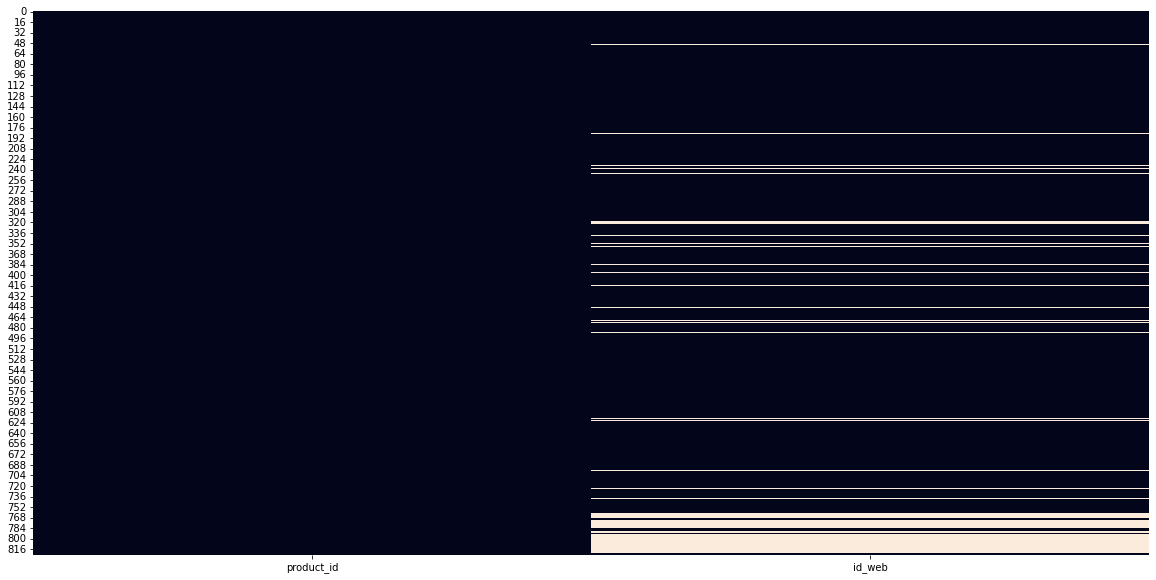

In [26]:
# Utiliser tt d'abord la fonction.isna () de pandas pour verifier les valeurs NaN
#Utiliser la fonction heatmap de seaborn pour afficher notre dataset 
plt.figure( figsize=(20,10)) # Afficher le graphique plus grand avec les dimensions 20,10
sns.heatmap( liaison_copie.isna(), cbar= False) # cbar=False pour elimimer la color bar 

# Conclusion
##### Variable target: price
##### Lignes et colonnes: 825,5
##### Types de variables: qualitatif:       quantitatif:
 int64      3
 float64    1
 object     1
 dtype: int64
##### Analyse des valeurs manquantes: peu de NAN ( valeurs manquantes) 

In [27]:
# supprimer les doublons dans la data liaison_copie
liaison_copie.drop_duplicates(inplace=True)
liaison_copie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  825 non-null    int64 
 1   id_web      734 non-null    object
dtypes: int64(1), object(1)
memory usage: 19.3+ KB


In [28]:
# merger les deux dataframes erp_copie et liaison_copie how= inner 
erp_liaison = pd.merge (erp_copie,liaison_copie , on = 'product_id', how = 'outer' )
erp_liaison.sample(10)

,product_id,onsale_web,price,stock_quantity,stock_status,id_web
678,6047,1,10.9,46,instock,16264
533,5546,1,15.2,130,instock,15202
327,4707,1,22.8,13,instock,15466
821,7204,0,45.0,9,instock,NaN
613,5800,0,32.3,0,outofstock,14689
124,4201,1,38.0,69,instock,15656
646,5907,1,17.7,5,instock,12882
710,6214,1,99.0,7,instock,11601
785,6926,1,49.9,24,instock,15845
74,4144,1,49.0,11,instock,1662


In [29]:
# Changer le type de la colonne product_id en object pour pouvoir merger après avec la data web
erp_liaison["product_id"] = erp_liaison["product_id"]. astype (str)

In [30]:
# Renommer la colonne SKU dans la data web pour pouvoir merger on id_web après erp_liaison
web_copie=web_copie.rename( columns={"sku": "id_web"})

In [38]:
# Merger les deux dataframes web_copie et erp_liaison how= outer
erp_liaison_web= pd. merge(web_copie, erp_liaison , on='id_web', how='outer')
erp_liaison_web

,id_web,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,...,guid,menu_order,post_type,post_mime_type,comment_count,product_id,onsale_web,price,stock_quantity,stock_status
0,bon-cadeau-25-euros,0.0,0.0,0.0,0.0,10.0,taxable,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,...,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,4954,1,25.0,0,instock
1,15298,0.0,0.0,0.0,0.0,6.0,taxable,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,...,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,3847,1,24.2,0,outofstock
2,15296,0.0,0.0,0.0,0.0,0.0,taxable,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,...,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,3849,1,34.3,0,outofstock
3,15300,0.0,0.0,0.0,0.0,0.0,taxable,2.0,2018-02-08 14:08:36,2018-02-08 13:08:36,...,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,3850,1,20.8,0,outofstock
4,19814,0.0,0.0,0.0,0.0,3.0,taxable,2.0,2018-02-09 14:01:05,2018-02-09 13:01:05,...,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,4032,1,14.1,0,outofstock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
820,15609,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaN,NaN,NaN,5954,0,18.8,0,outofstock
821,14377,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaN,NaN,NaN,5955,0,27.3,0,outofstock
822,13577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaN,NaN,NaN,5957,0,39.0,0,outofstock
823,15529,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaN,NaN,NaN,6100,0,12.9,0,outofstock


In [42]:
# Ajouter une colonne dans le tableau de la data erp_laison_web et calculer le chiffre d'affaire par produit en utilisant la multiplication
erp_liaison_web ["CA_par_produit"] = erp_liaison_web["total_sales"] * erp_liaison_web["price"]
erp_liaison_web.head()

,id_web,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,...,menu_order,post_type,post_mime_type,comment_count,product_id,onsale_web,price,stock_quantity,stock_status,CA_par_produit
0,bon-cadeau-25-euros,0.0,0.0,0.0,0.0,10.0,taxable,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,...,0.0,product,NaN,0.0,4954,1,25.0,0,instock,250.0
1,15298,0.0,0.0,0.0,0.0,6.0,taxable,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,...,0.0,product,NaN,0.0,3847,1,24.2,0,outofstock,145.2
2,15296,0.0,0.0,0.0,0.0,0.0,taxable,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,...,0.0,product,NaN,0.0,3849,1,34.3,0,outofstock,0.0
3,15300,0.0,0.0,0.0,0.0,0.0,taxable,2.0,2018-02-08 14:08:36,2018-02-08 13:08:36,...,0.0,product,NaN,0.0,3850,1,20.8,0,outofstock,0.0
4,19814,0.0,0.0,0.0,0.0,3.0,taxable,2.0,2018-02-09 14:01:05,2018-02-09 13:01:05,...,0.0,product,NaN,0.0,4032,1,14.1,0,outofstock,42.3


In [44]:
# Ordre décroissant du chiffre d'affaires par produit 
erp_liaison_web=erp_liaison_web.sort_values(by='CA_par_produit', ascending=False)
erp_liaison_web

,id_web,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,...,menu_order,post_type,post_mime_type,comment_count,product_id,onsale_web,price,stock_quantity,stock_status,CA_par_produit
195,7818,0.0,0.0,0.0,0.0,96.0,taxable,2.0,2018-03-01 14:02:44,2018-03-01 13:02:44,...,0.0,product,NaN,0.0,4334,1,49.0,0,outofstock,4704.0
72,1662,0.0,0.0,0.0,0.0,87.0,taxable,2.0,2018-02-13 13:17:25,2018-02-13 12:17:25,...,0.0,product,NaN,0.0,4144,1,49.0,11,instock,4263.0
219,3510,0.0,0.0,0.0,0.0,13.0,taxable,2.0,2018-03-22 11:21:05,2018-03-22 10:21:05,...,0.0,product,NaN,0.0,4402,1,176.0,8,instock,2288.0
71,11641,0.0,0.0,0.0,0.0,30.0,taxable,2.0,2018-02-13 13:08:44,2018-02-13 12:08:44,...,0.0,product,NaN,0.0,4142,1,53.0,8,instock,1590.0
70,304,0.0,0.0,0.0,0.0,40.0,taxable,2.0,2018-02-13 12:57:44,2018-02-13 11:57:44,...,0.0,product,NaN,0.0,4141,1,39.0,1,instock,1560.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
820,15609,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaN,NaN,5954,0,18.8,0,outofstock,NaN
821,14377,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaN,NaN,5955,0,27.3,0,outofstock,NaN
822,13577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaN,NaN,5957,0,39.0,0,outofstock,NaN
823,15529,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaN,NaN,6100,0,12.9,0,outofstock,NaN


In [ ]:
# Calculer le chiffre d'affaires Total en euro
CA_total_enligne= erp_laison_web ['CA_par_produit'].sum()
CA_total_enligne

#### Le chiffre d'affaire total est de 70 milles 568 euros entre le 08/02/2018 et le 20/07/2020 